In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import math
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

import os

#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
child_mortality = pd.read_csv("E:\Detailed_Project\child_mortality_0_5_year_olds_dying_per_1000_born.csv")
children_per_woman = pd.read_csv("E:\Detailed_Project\children_per_woman_total_fertility.csv")
co2_emissions = pd.read_csv("E:\Detailed_Project\co2_emissions_tonnes_per_person.csv")
income = pd.read_csv("E:\Detailed_Project\income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
life_expectancy = pd.read_csv("E:\Detailed_Project\life_expectancy_years.csv")
population = pd.read_csv("E:\Detailed_Project\population_total.csv")
country_info = pd.read_csv("E:\Detailed_Project\country_info.csv")

In [3]:
# Creates a list country names.
countries = population['country'].tolist()

In [4]:
# Set the index of each dataframe to the 'country' column.
child_mortality = child_mortality.set_index('country')
children_per_woman = children_per_woman.set_index('country')
co2_emissions = co2_emissions.set_index('country')
income = income.set_index('country')
life_expectancy = life_expectancy.set_index('country')
population = population.set_index('country')
country_info = country_info.set_index('name')

In [5]:
# Create the dataframes for analysis and give them countries as indexes to match the above dataframes.
stats_1967 = pd.DataFrame(index=countries)
stats_2017 = pd.DataFrame(index=countries)

In [6]:
# Populate the 1967 dataframe with the chosen statistics.
stats_1967['child_mortality'] = child_mortality['1967']
stats_1967['children_per_woman'] = children_per_woman['1967']
stats_1967['co2_emissions'] = co2_emissions['1967']
stats_1967['income'] = income['1967']
stats_1967['life_expectancy'] = life_expectancy['1967']
stats_1967['population'] = population['1967']
stats_1967.head()

,child_mortality,children_per_woman,co2_emissions,income,life_expectancy,population
Afghanistan,319.0,7.45,0.123,2600.0,44.5,10400000
Albania,142.0,5.39,1.340,3220.0,66.3,2000000
Algeria,247.0,7.67,0.636,6700.0,56.5,13300000
Andorra,26.6,NaN,NaN,26300.0,NaN,20800
Angola,283.0,7.61,0.172,5410.0,44.7,5770000


In [7]:
# Check data types.
stats_1967.dtypes

child_mortality       float64
children_per_woman    float64
co2_emissions         float64
income                float64
life_expectancy       float64
population              int64
dtype: object

In [8]:
# Check for missing data.
stats_1967.isnull().sum()

child_mortality        0
children_per_woman    11
co2_emissions         18
income                 2
life_expectancy       11
population             0
dtype: int64

In [9]:
# Impute missing values using a median strategy. 
myimputer = SimpleImputer(strategy='median')
stats_1967_imp = pd.DataFrame(myimputer.fit_transform(stats_1967), index=countries)
stats_1967_imp.columns = stats_1967.columns
stats_1967_imp.head()

,child_mortality,children_per_woman,co2_emissions,income,life_expectancy,population
Afghanistan,319.0,7.450,0.123,2600.0,44.5,10400000.0
Albania,142.0,5.390,1.340,3220.0,66.3,2000000.0
Algeria,247.0,7.670,0.636,6700.0,56.5,13300000.0
Andorra,26.6,6.055,1.100,26300.0,60.9,20800.0
Angola,283.0,7.610,0.172,5410.0,44.7,5770000.0


In [10]:
# Re-check missing values. Should return 0.
stats_1967_imp.isnull().sum()

child_mortality       0
children_per_woman    0
co2_emissions         0
income                0
life_expectancy       0
population            0
dtype: int64

In [11]:
# Populate the 2017 dataframe with the chosen statistics.
stats_2017['child_mortality'] = child_mortality['2017']
stats_2017['children_per_woman'] = children_per_woman['2017']
stats_2017['co2_emissions'] = co2_emissions['2017']
stats_2017['income'] = income['2017']
stats_2017['life_expectancy'] = life_expectancy['2017']
stats_2017['population'] = population['2017']
stats_2017.head()

,child_mortality,children_per_woman,co2_emissions,income,life_expectancy,population
Afghanistan,64.70,4.48,0.247,1760.0,63.4,36300000
Albania,9.02,1.71,1.610,11800.0,78.2,2880000
Algeria,24.00,2.71,3.560,13900.0,77.7,41400000
Andorra,3.01,NaN,6.270,49800.0,82.7,77000
Angola,80.40,5.62,1.140,6050.0,64.2,29800000


In [12]:
# Check data types.
stats_2017.dtypes

child_mortality       float64
children_per_woman    float64
co2_emissions         float64
income                float64
life_expectancy       float64
population              int64
dtype: object

In [13]:
# Check for missing values.
stats_2017.isnull().sum()

child_mortality        0
children_per_woman    11
co2_emissions          3
income                 2
life_expectancy        8
population             0
dtype: int64

In [14]:
# Impute missing values using a median strategy.
stats_2017_imp = pd.DataFrame(myimputer.fit_transform(stats_2017), index=countries)
stats_2017_imp.columns = stats_2017.columns
stats_2017_imp.head()

,child_mortality,children_per_woman,co2_emissions,income,life_expectancy,population
Afghanistan,64.70,4.480,0.247,1760.0,63.4,36300000.0
Albania,9.02,1.710,1.610,11800.0,78.2,2880000.0
Algeria,24.00,2.710,3.560,13900.0,77.7,41400000.0
Andorra,3.01,2.285,6.270,49800.0,82.7,77000.0
Angola,80.40,5.620,1.140,6050.0,64.2,29800000.0


In [15]:
# Re-check for missing values. Should return 0.
stats_2017_imp.isnull().sum()

child_mortality       0
children_per_woman    0
co2_emissions         0
income                0
life_expectancy       0
population            0
dtype: int64

In [16]:
# Add country region, which will be used for visualization customization. 
stats_1967_imp['region'] = country_info['four_regions']
stats_2017_imp['region'] = country_info['four_regions']

In [17]:
# After identifying two missing region values, data exploration outside of this notebook led to the following adjustments.
stats_1967_imp.loc['Eswatini', 'region'] = 'africa'
stats_1967_imp.loc['North Macedonia', 'region'] = 'europe'
stats_2017_imp.loc['Eswatini', 'region'] = 'africa'
stats_2017_imp.loc['North Macedonia', 'region'] = 'europe'

In [18]:
# Shortening the dataframe name for ease of use.
stats1967 = stats_1967_imp
stats2017 = stats_2017_imp

In [19]:
# Creating a column of scaled population for use in visualization customization. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stats1967['scaled pop'] = scaler.fit_transform(stats1967[['population']])
stats2017['scaled pop'] = scaler.fit_transform(stats2017[['population']])

In [20]:
# In order to recreate some visualizations, child_mortality had to be transformed to child_survival_percent, done below.
stats1967['child_survival_percent'] = (1 - (stats1967['child_mortality'] / 1000)) * 100
stats2017['child_survival_percent'] = (1 - (stats2017['child_mortality'] / 1000)) * 100

<AxesSubplot:xlabel='co2_emissions', ylabel='Density'>

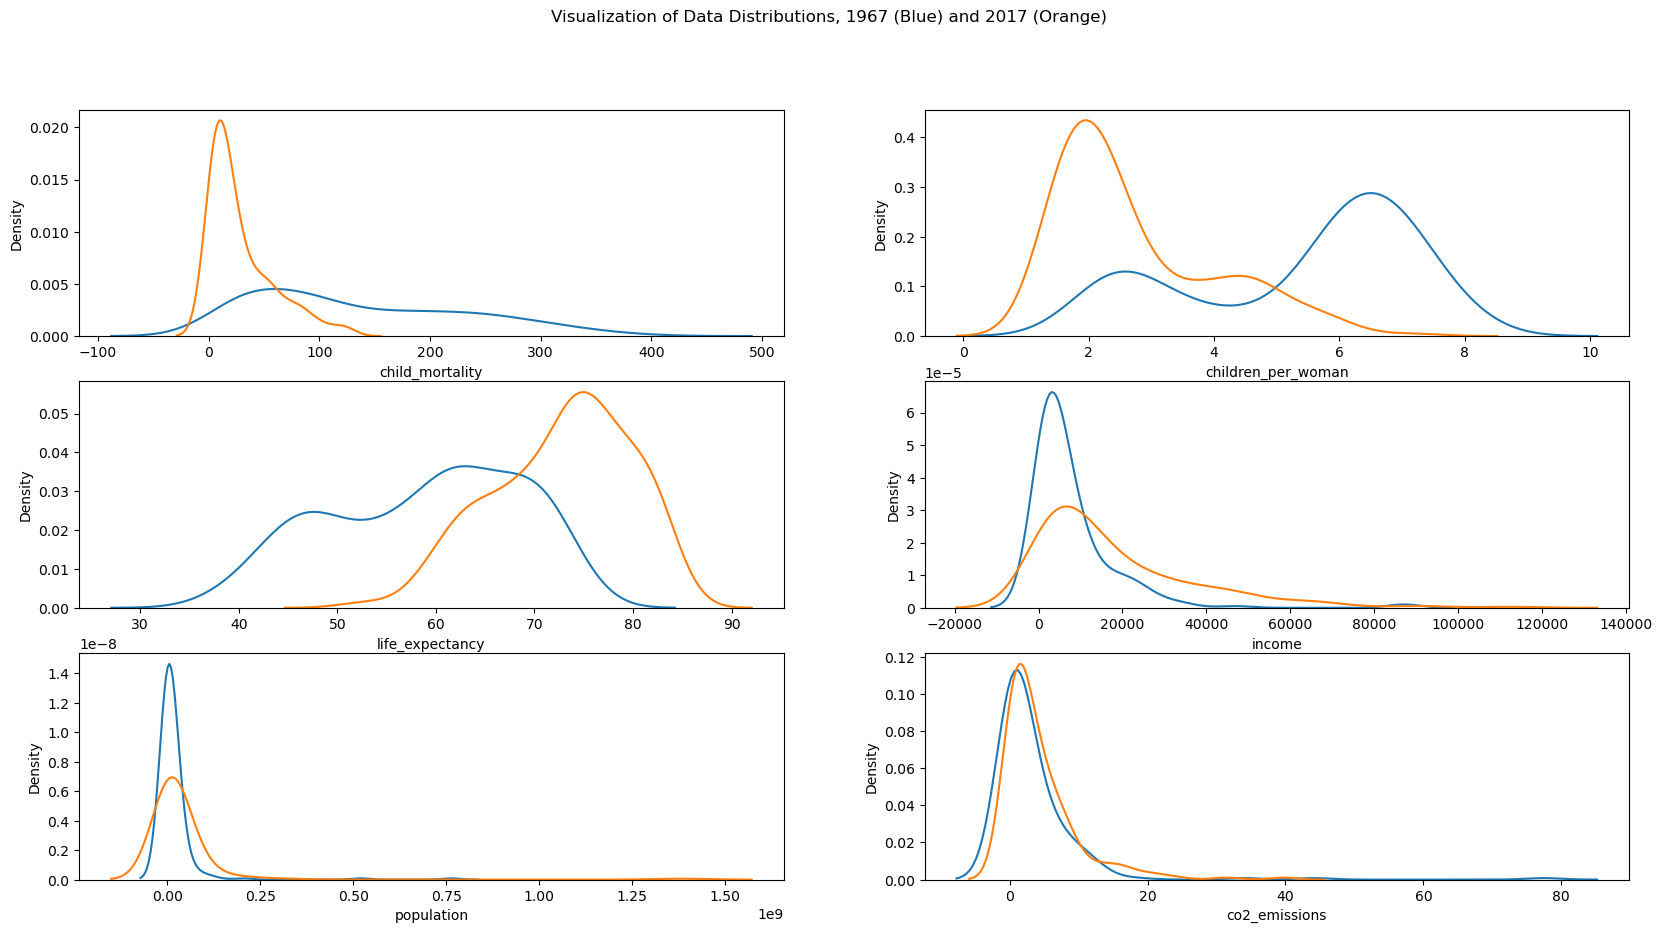

In [21]:
# The following code plots the distribution of each column in both 1967 and 2017.
# These plots serve as a check of the data, as well as a way to examine how many of the key metrics have changed over the past 50 years.
fig1, axes = plt.subplots(3, 2, figsize=(20, 10))
fig1.suptitle('Visualization of Data Distributions, 1967 (Blue) and 2017 (Orange)')
sns.kdeplot(ax=axes[0,0], data=stats1967['child_mortality'])
sns.kdeplot(ax=axes[0,0], data=stats2017['child_mortality'])
sns.kdeplot(ax=axes[0,1], data=stats1967['children_per_woman'])
sns.kdeplot(ax=axes[0,1], data=stats2017['children_per_woman'])
sns.kdeplot(ax=axes[1,0], data=stats1967['life_expectancy'])
sns.kdeplot(ax=axes[1,0], data=stats2017['life_expectancy'])
sns.kdeplot(ax=axes[1,1], data=stats1967['income'])
sns.kdeplot(ax=axes[1,1], data=stats2017['income'])
sns.kdeplot(ax=axes[2,0], data=stats1967['population'])
sns.kdeplot(ax=axes[2,0], data=stats2017['population'])
sns.kdeplot(ax=axes[2,1], data=stats1967['co2_emissions'])
sns.kdeplot(ax=axes[2,1], data=stats2017['co2_emissions'])

In [29]:
stats2017.head()

,child_mortality,children_per_woman,co2_emissions,income,life_expectancy,population,region,scaled pop,child_survival_percent
Afghanistan,64.70,4.480,0.247,1760.0,63.4,36300000.0,asia,-0.015376,93.530
Albania,9.02,1.710,1.610,11800.0,78.2,2880000.0,europe,-0.247535,99.098
Algeria,24.00,2.710,3.560,13900.0,77.7,41400000.0,africa,0.020052,97.600
Andorra,3.01,2.285,6.270,49800.0,82.7,77000.0,europe,-0.267007,99.699
Angola,80.40,5.620,1.140,6050.0,64.2,29800000.0,africa,-0.060530,91.960


In [22]:
# Creates a function for labeling data points within the scatter plots. Labeling each point overwhelms the plot, thus I 've created a list
# of a handful of 'key' countries to label. These may be altered to suit individual interests.
key_countries = ['China', 'India', 'United States', 'Germany', 'Iran', 'Afghanistan', 'Japan', 'South Korea', 'South Sudan', 'Congo, Dem. Rep.']
def label_point(x, y, value, ax):
    a = pd.concat({'x': x, 'y': y, 'value': value}, axis=1)
    for i, point in a.iterrows():
        if i in key_countries:
            ax.text(point['x']+0.1, point['y']+0.1, str(point['value']))
        else:
            pass

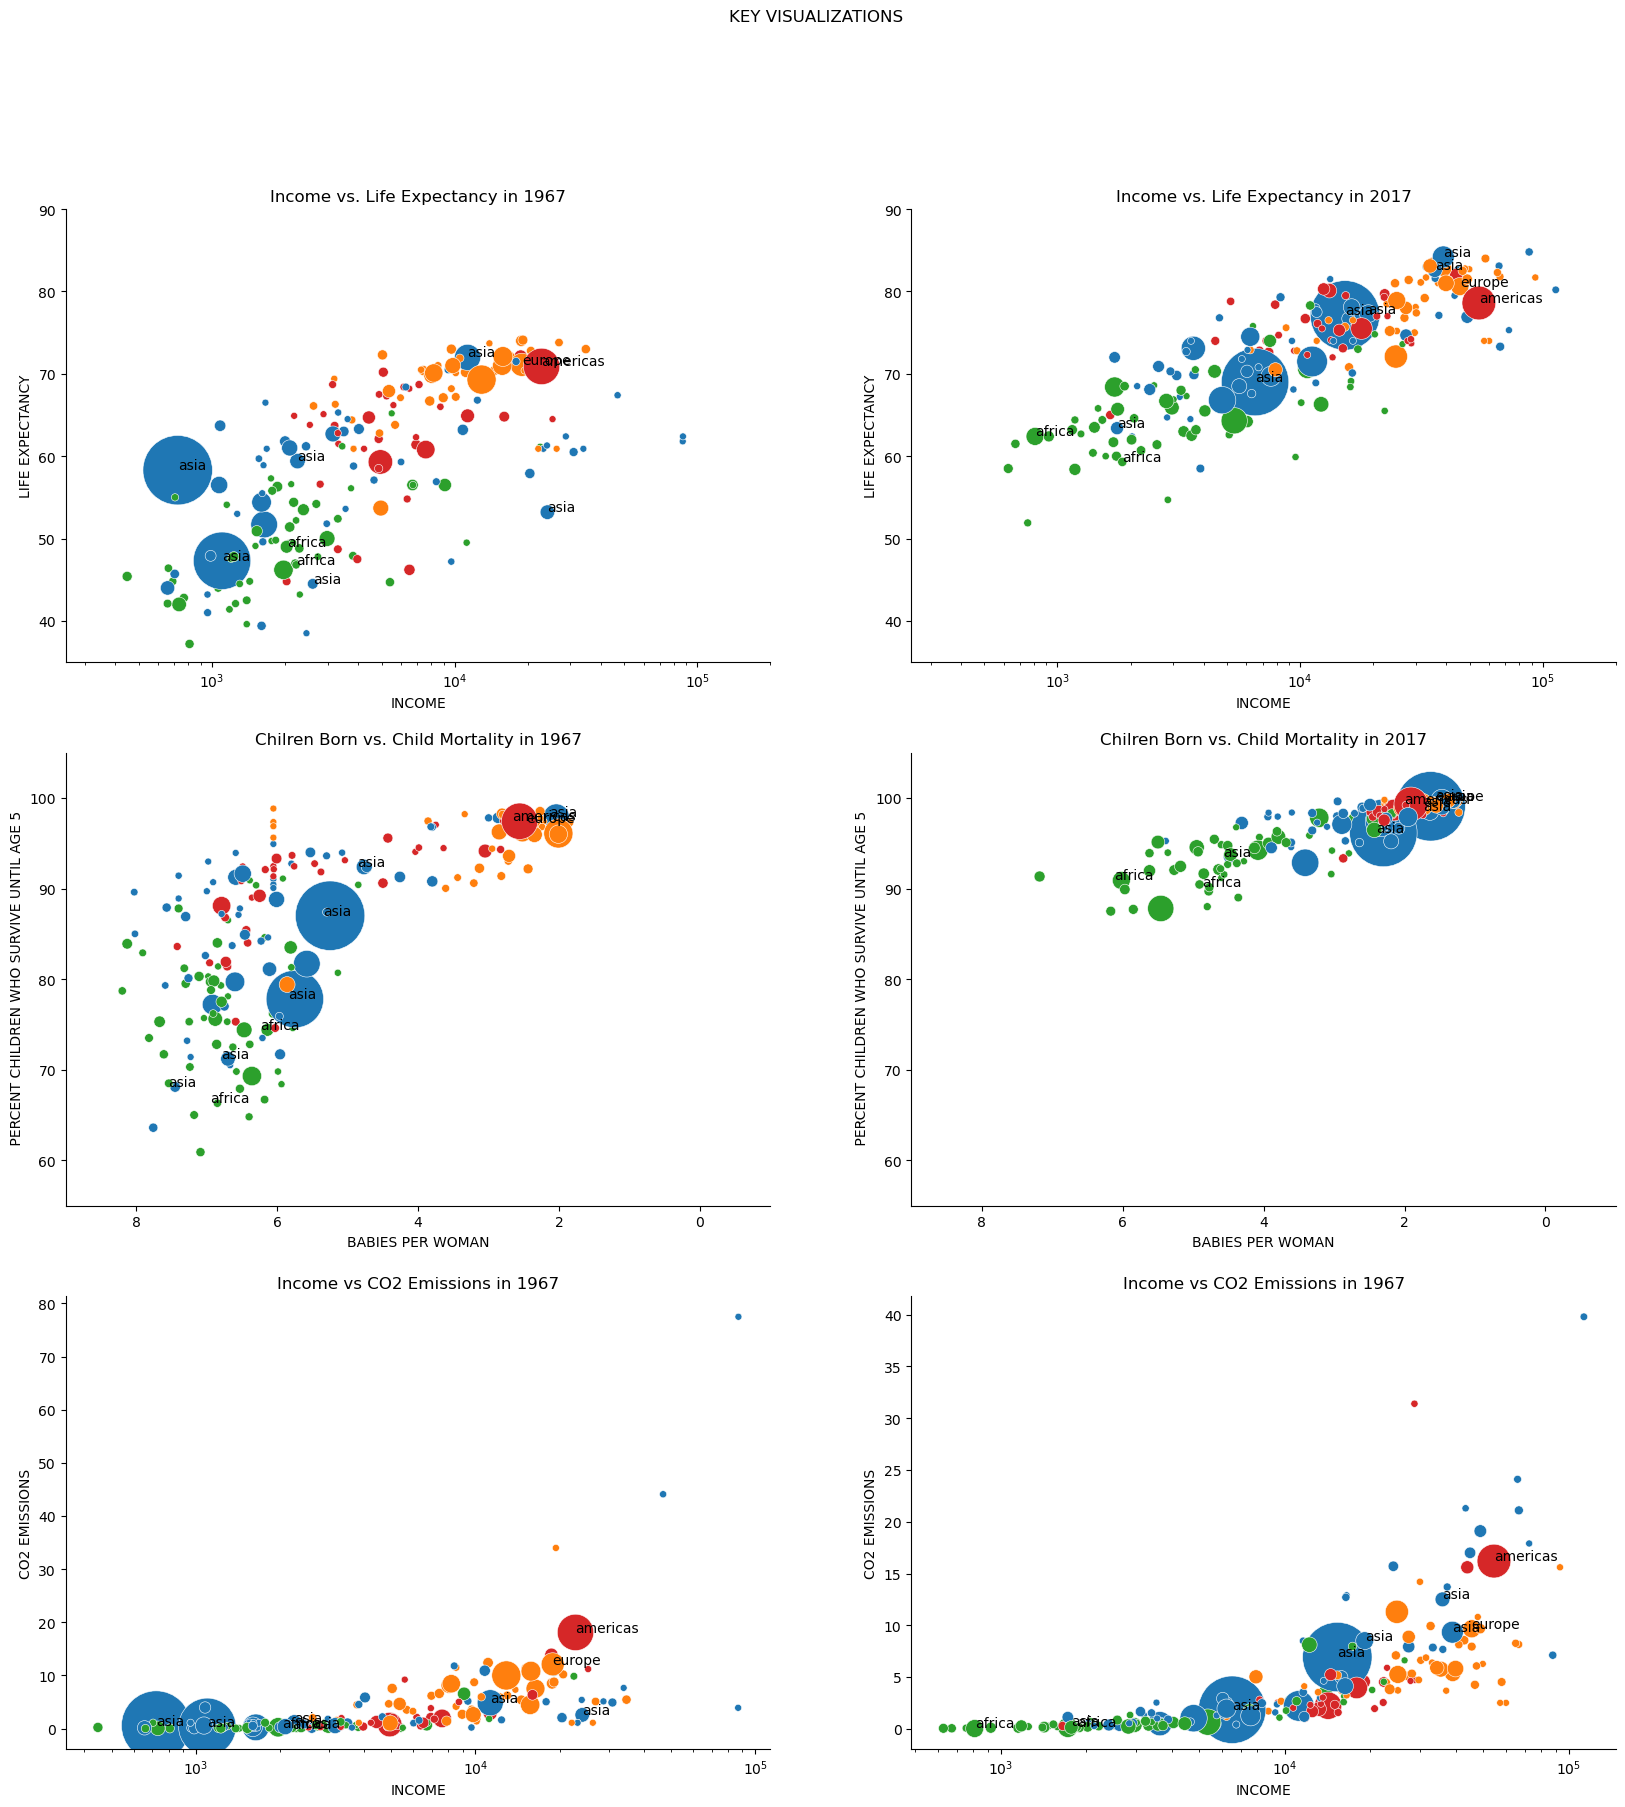

In [30]:
# The code below creates a figure with six plots, each of the key plots (3) mentioned earlier for each of the years of interest (2).
fig2, axes = plt.subplots(3, 2, figsize=(20, 20))
fig2.suptitle('KEY VISUALIZATIONS')
sns.scatterplot(ax=axes[0,0], data=stats1967, x='income', y='life_expectancy', hue='region', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0,0].set(xscale='log', xlim=(250, 200000), ylim=(35, 90), xlabel='INCOME', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 1967')
sns.scatterplot(ax=axes[0,1], data=stats2017, x='income', y='life_expectancy', hue='region', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0, 1].set(xscale='log', xlim=(250, 200000), ylim=(35, 90), xlabel='INCOME', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 2017')
sns.scatterplot(ax=axes[1,0], data=stats1967, x='children_per_woman', y='child_survival_percent', hue='region', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,0].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 1967')
sns.scatterplot(ax=axes[1,1], data=stats2017, x='children_per_woman', y='child_survival_percent', hue='region', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,1].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 2017')
sns.scatterplot(ax=axes[2,0], data=stats1967, x='income', y='co2_emissions', hue='region', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,0].set(xscale='log', xlabel='INCOME', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
sns.scatterplot(ax=axes[2,1], data=stats2017, x='income', y='co2_emissions', hue='region', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,1].set(xscale='log', xlabel='INCOME', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
label_point(stats1967['income'], stats1967['life_expectancy'], stats1967['region'], axes[0,0])
label_point(stats2017['income'], stats2017['life_expectancy'], stats2017['region'], axes[0,1])
label_point(stats1967['children_per_woman'], stats1967['child_survival_percent'], stats1967['region'], axes[1,0])
label_point(stats2017['children_per_woman'], stats2017['child_survival_percent'], stats2017['region'], axes[1,1])
label_point(stats1967['income'], stats1967['co2_emissions'], stats1967['region'], axes[2,0])
label_point(stats2017['income'], stats2017['co2_emissions'], stats2017['region'], axes[2,1])
sns.despine()

In [31]:
# Select a subset of columns (the five key metrics of the dataset) to input into the model.
columns_for_modeling = ['child_mortality', 'children_per_woman', 'co2_emissions', 'income', 'life_expectancy'] # Removed population after first pass.
data2017 = stats2017[columns_for_modeling]
data1967 = stats1967[columns_for_modeling]
# Standardize the data for use in the KMeans model.
data2017s = pd.DataFrame(scaler.fit_transform(data2017))
data1967s = pd.DataFrame(scaler.fit_transform(data1967))
data2017s.head()

,0,1,2,3,4
0,1.226489,1.359271,-0.744708,-0.848971,-1.358886
1,-0.683445,-0.807148,-0.501271,-0.327538,0.783091
2,-0.169601,-0.025047,-0.152995,-0.218473,0.710727
3,-0.889599,-0.357440,0.331021,1.646014,1.434367
4,1.765029,2.250865,-0.585215,-0.626168,-1.243104


In [32]:
# This code evaluates inertia for a range of n_clusters.
inertia2017 = []
for clusters in range(1, 10):
    model = KMeans(n_clusters=clusters)
    model.fit(data2017s)
    inertia2017.append(model.inertia_)
print(inertia2017)

[975.0000000000001, 492.74882402967353, 308.09174138659097, 247.5357807222171, 204.6184773088236, 175.42490452623483, 156.24411522759348, 142.03683530003622, 130.36325488644738]


<AxesSubplot:>

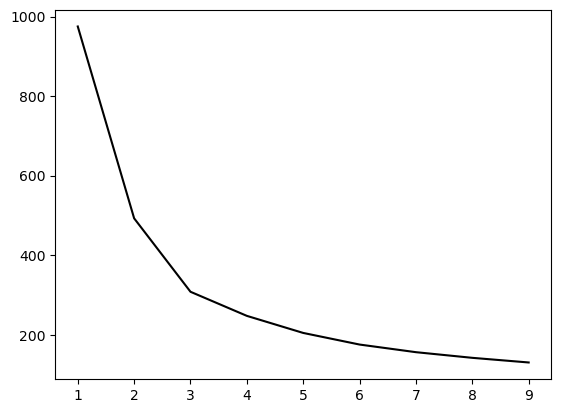

In [33]:
# Plot the change in inertia against change in n_clusters.
sns.lineplot(x=range(1,10), y=inertia2017, color='black')

In [34]:
# This code evaluates inertia for a range of n_clusters for 1967.
inertia1967 = []
for clusters in range(1, 10):
    model = KMeans(n_clusters=clusters)
    model.fit(data1967s)
    inertia1967.append(model.inertia_)
print(inertia1967)

[975.0000000000001, 550.6840469268236, 380.39559825539675, 249.64183900411865, 201.353826152622, 172.85726713436296, 147.94826706579806, 124.39658025136572, 107.16811641882617]


<AxesSubplot:>

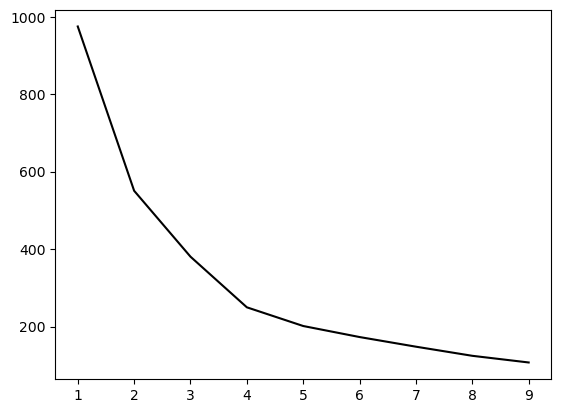

In [35]:
# Plot the change in inertia against change in n_clusters.
sns.lineplot(x=range(1,10), y=inertia1967, color='black')

In [36]:
# Create models with varying n_clusters.
model2 = KMeans(n_clusters=2)
model3 = KMeans(n_clusters=3)
model4 = KMeans(n_clusters=4)
model5 = KMeans(n_clusters=5)

In [37]:
# This cell fits and predicts the model, puts the predictions in a dataframe, indexes the dataframe, and renames the column.
y2_17 = pd.DataFrame(model2.fit_predict(data2017s), index=countries, columns=['groups_2'])
y2_67 = pd.DataFrame(model2.fit_predict(data1967s), index=countries, columns=['groups_2'])
y3_17 = pd.DataFrame(model3.fit_predict(data2017s), index=countries, columns=['groups_3'])
y3_67 = pd.DataFrame(model3.fit_predict(data1967s), index=countries, columns=['groups_3'])
y4_17 = pd.DataFrame(model4.fit_predict(data2017s), index=countries, columns=['groups_4'])
y4_67 = pd.DataFrame(model4.fit_predict(data1967s), index=countries, columns=['groups_4'])
y5_17 = pd.DataFrame(model5.fit_predict(data2017s), index=countries, columns=['groups_5'])
y5_67 = pd.DataFrame(model5.fit_predict(data1967s), index=countries, columns=['groups_5'])

In [38]:
# Adds the predictions from each model to its corresponding dataframe (1967 or 2017).
stats2017['groups_2'] = y2_17['groups_2']
stats2017['groups_3'] = y3_17['groups_3']
stats2017['groups_4'] = y4_17['groups_4']
stats2017['groups_5'] = y5_17['groups_5']
stats1967['groups_2'] = y2_67['groups_2']
stats1967['groups_3'] = y3_67['groups_3']
stats1967['groups_4'] = y4_67['groups_4']
stats1967['groups_5'] = y5_67['groups_5']

In [39]:
# This code allows us to inspect the number of countries in each group.
print(stats2017['groups_2'].value_counts())
print(stats2017['groups_3'].value_counts())
print(stats2017['groups_4'].value_counts())
print(stats2017['groups_5'].value_counts())
print(stats1967['groups_2'].value_counts())
print(stats1967['groups_3'].value_counts())
print(stats1967['groups_4'].value_counts())
print(stats1967['groups_5'].value_counts())

0    137
1     58
Name: groups_2, dtype: int64
0    98
1    51
2    46
Name: groups_3, dtype: int64
0    91
1    51
3    43
2    10
Name: groups_4, dtype: int64
2    84
0    43
1    38
3    20
4    10
Name: groups_5, dtype: int64
0    108
1     87
Name: groups_2, dtype: int64
0    109
1     83
2      3
Name: groups_3, dtype: int64
1    68
2    68
0    56
3     3
Name: groups_4, dtype: int64
1    66
2    60
4    56
0    11
3     2
Name: groups_5, dtype: int64


In [40]:
# For plotting purposes, I've created an income_per_day column.
# A reminder, the income column is GDP/person.
stats2017['income_per_day'] = stats_2017['income']/365
stats1967['income_per_day'] = stats_1967['income']/365

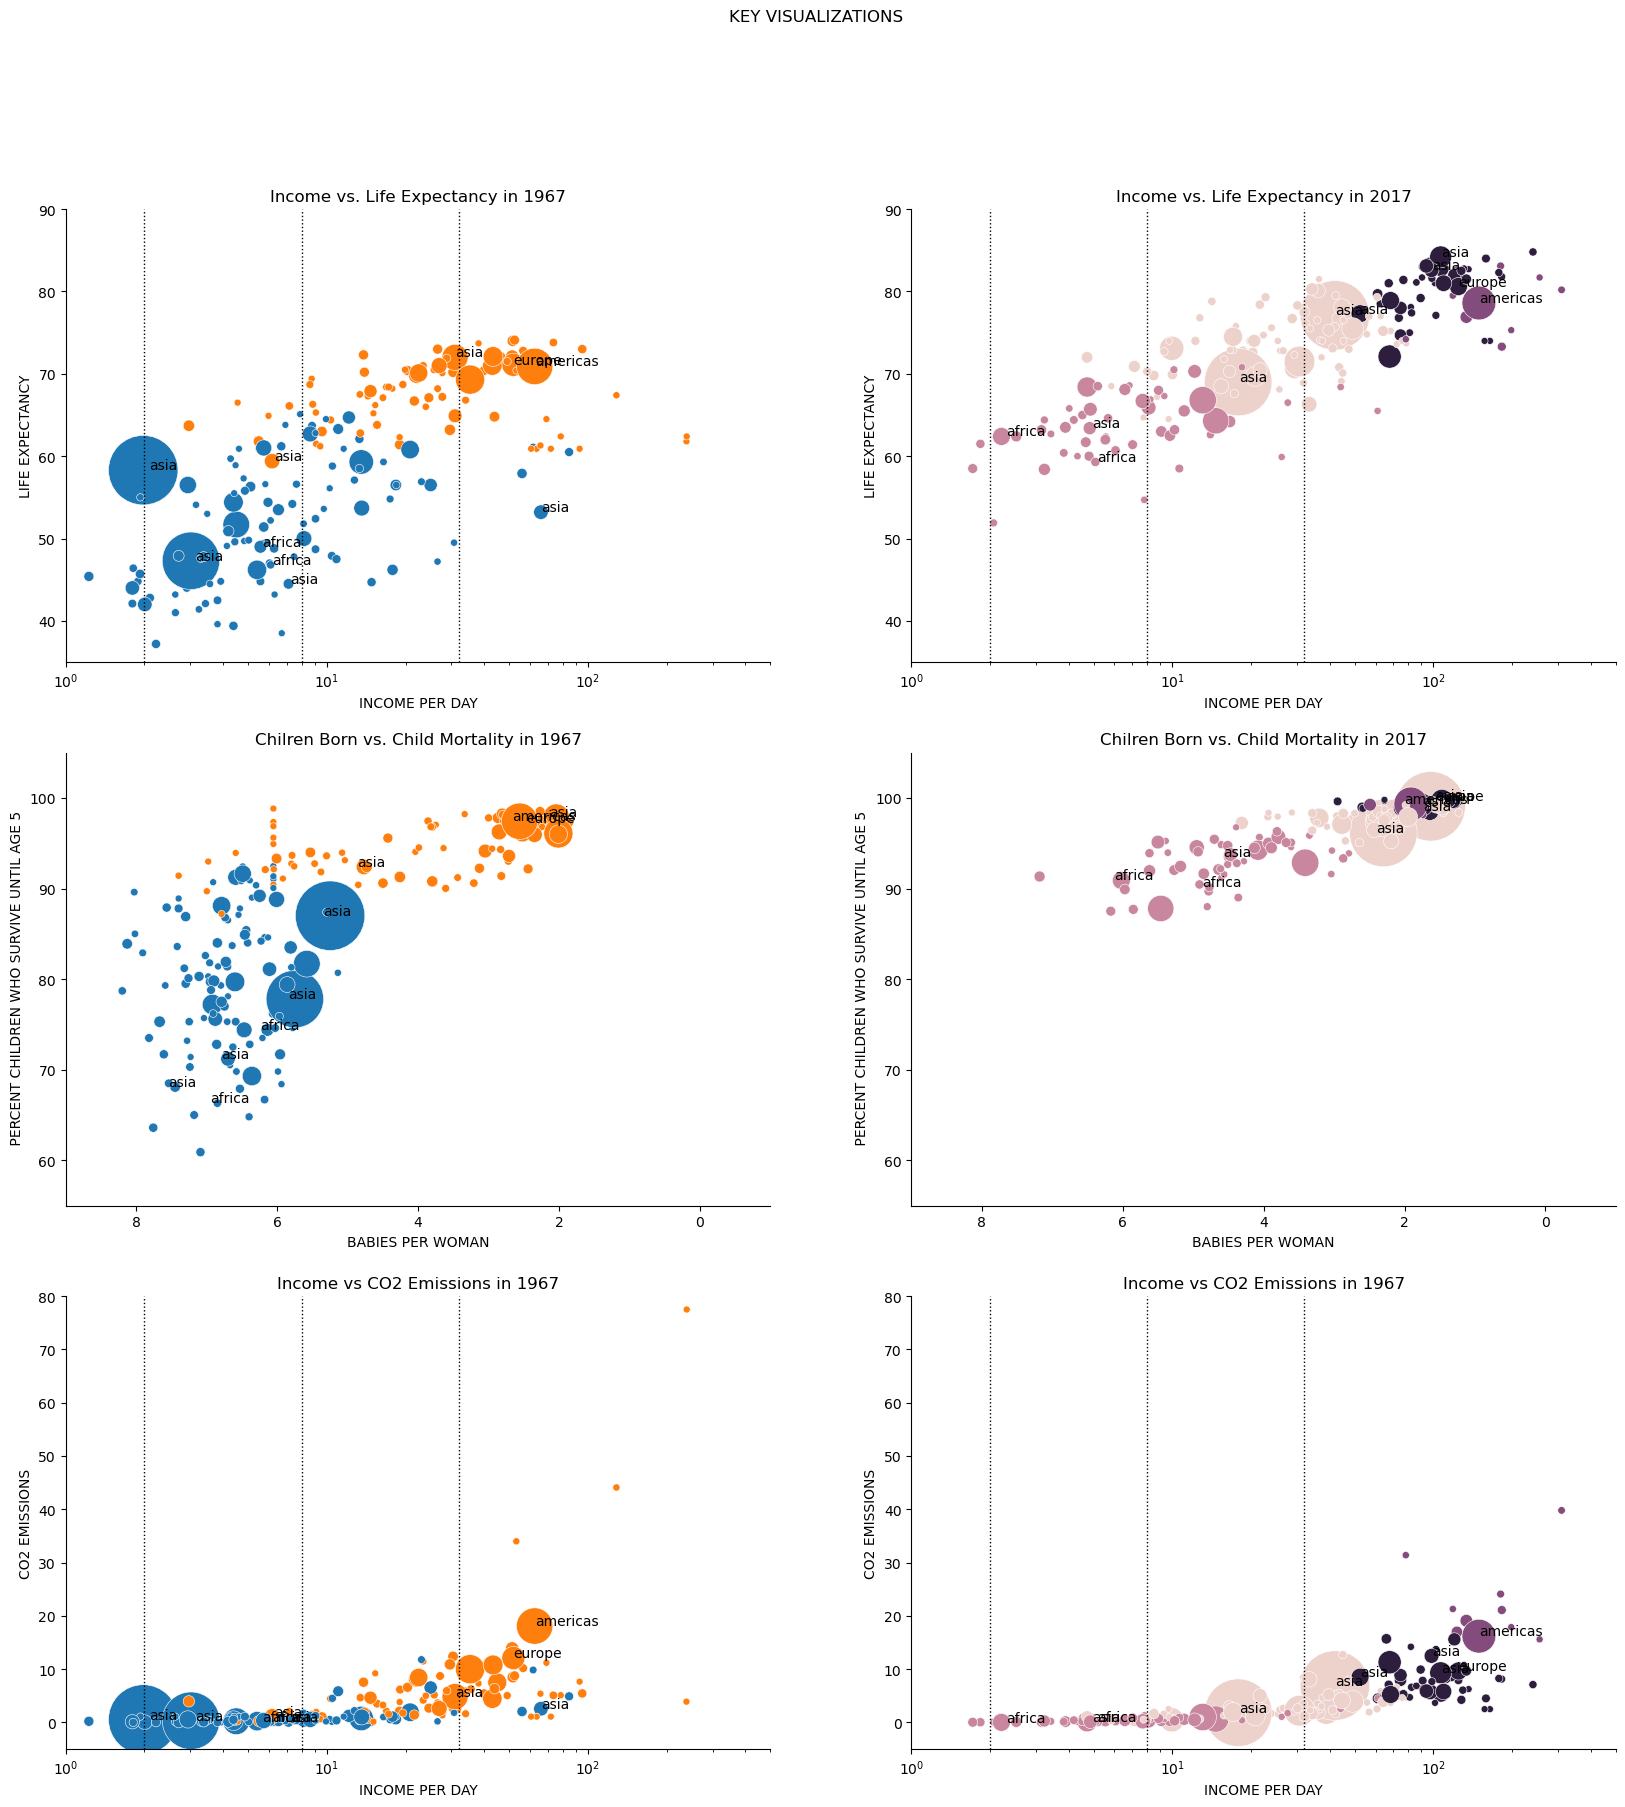

In [41]:
# Here I re-create the plots from above. A few adjustments have been made. Income is now Income Per Day. I've also added vertical lines
# to represent the divisions between the income levels as defined by Factfulness ($2, $8, $32 per day).
fig4, axes = plt.subplots(3, 2, figsize=(20, 20))
fig4.suptitle('KEY VISUALIZATIONS')
sns.scatterplot(ax=axes[0,0], data=stats1967, x='income_per_day', y='life_expectancy', hue='groups_2', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0,0].set(xscale='log', xlim=(1, 500), ylim=(35, 90), xlabel='INCOME PER DAY', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 1967')
axes[0,0].vlines(x=[2, 8, 32], ymin=35, ymax=90, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[0,1], data=stats2017, x='income_per_day', y='life_expectancy', hue='groups_4', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0,1].set(xscale='log', xlim=(1, 500), ylim=(35, 90), xlabel='INCOME PER DAY', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 2017')
axes[0,1].vlines(x=[2, 8, 32], ymin=35, ymax=90, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[1,0], data=stats1967, x='children_per_woman', y='child_survival_percent', hue='groups_2', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,0].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 1967')
sns.scatterplot(ax=axes[1,1], data=stats2017, x='children_per_woman', y='child_survival_percent', hue='groups_4', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,1].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 2017')
sns.scatterplot(ax=axes[2,0], data=stats1967, x='income_per_day', y='co2_emissions', hue='groups_2', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,0].set(xscale='log', xlim=(1, 500), ylim=(-5, 80), xlabel='INCOME PER DAY', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
axes[2,0].vlines(x=[2, 8, 32], ymin=-5, ymax=80, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[2,1], data=stats2017, x='income_per_day', y='co2_emissions', hue='groups_4', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,1].set(xscale='log', xlim=(1, 500), ylim=(-5, 80), xlabel='INCOME PER DAY', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
axes[2,1].vlines(x=[2, 8, 32], ymin=-5, ymax=80, linewidth=1, color='black', linestyles='dotted')
label_point(stats1967['income_per_day'], stats1967['life_expectancy'], stats1967['region'], axes[0,0])
label_point(stats2017['income_per_day'], stats2017['life_expectancy'], stats2017['region'], axes[0,1])
label_point(stats1967['children_per_woman'], stats1967['child_survival_percent'], stats1967['region'], axes[1,0])
label_point(stats2017['children_per_woman'], stats2017['child_survival_percent'], stats2017['region'], axes[1,1])
label_point(stats1967['income_per_day'], stats1967['co2_emissions'], stats1967['region'], axes[2,0])
label_point(stats2017['income_per_day'], stats2017['co2_emissions'], stats2017['region'], axes[2,1])
sns.despine()

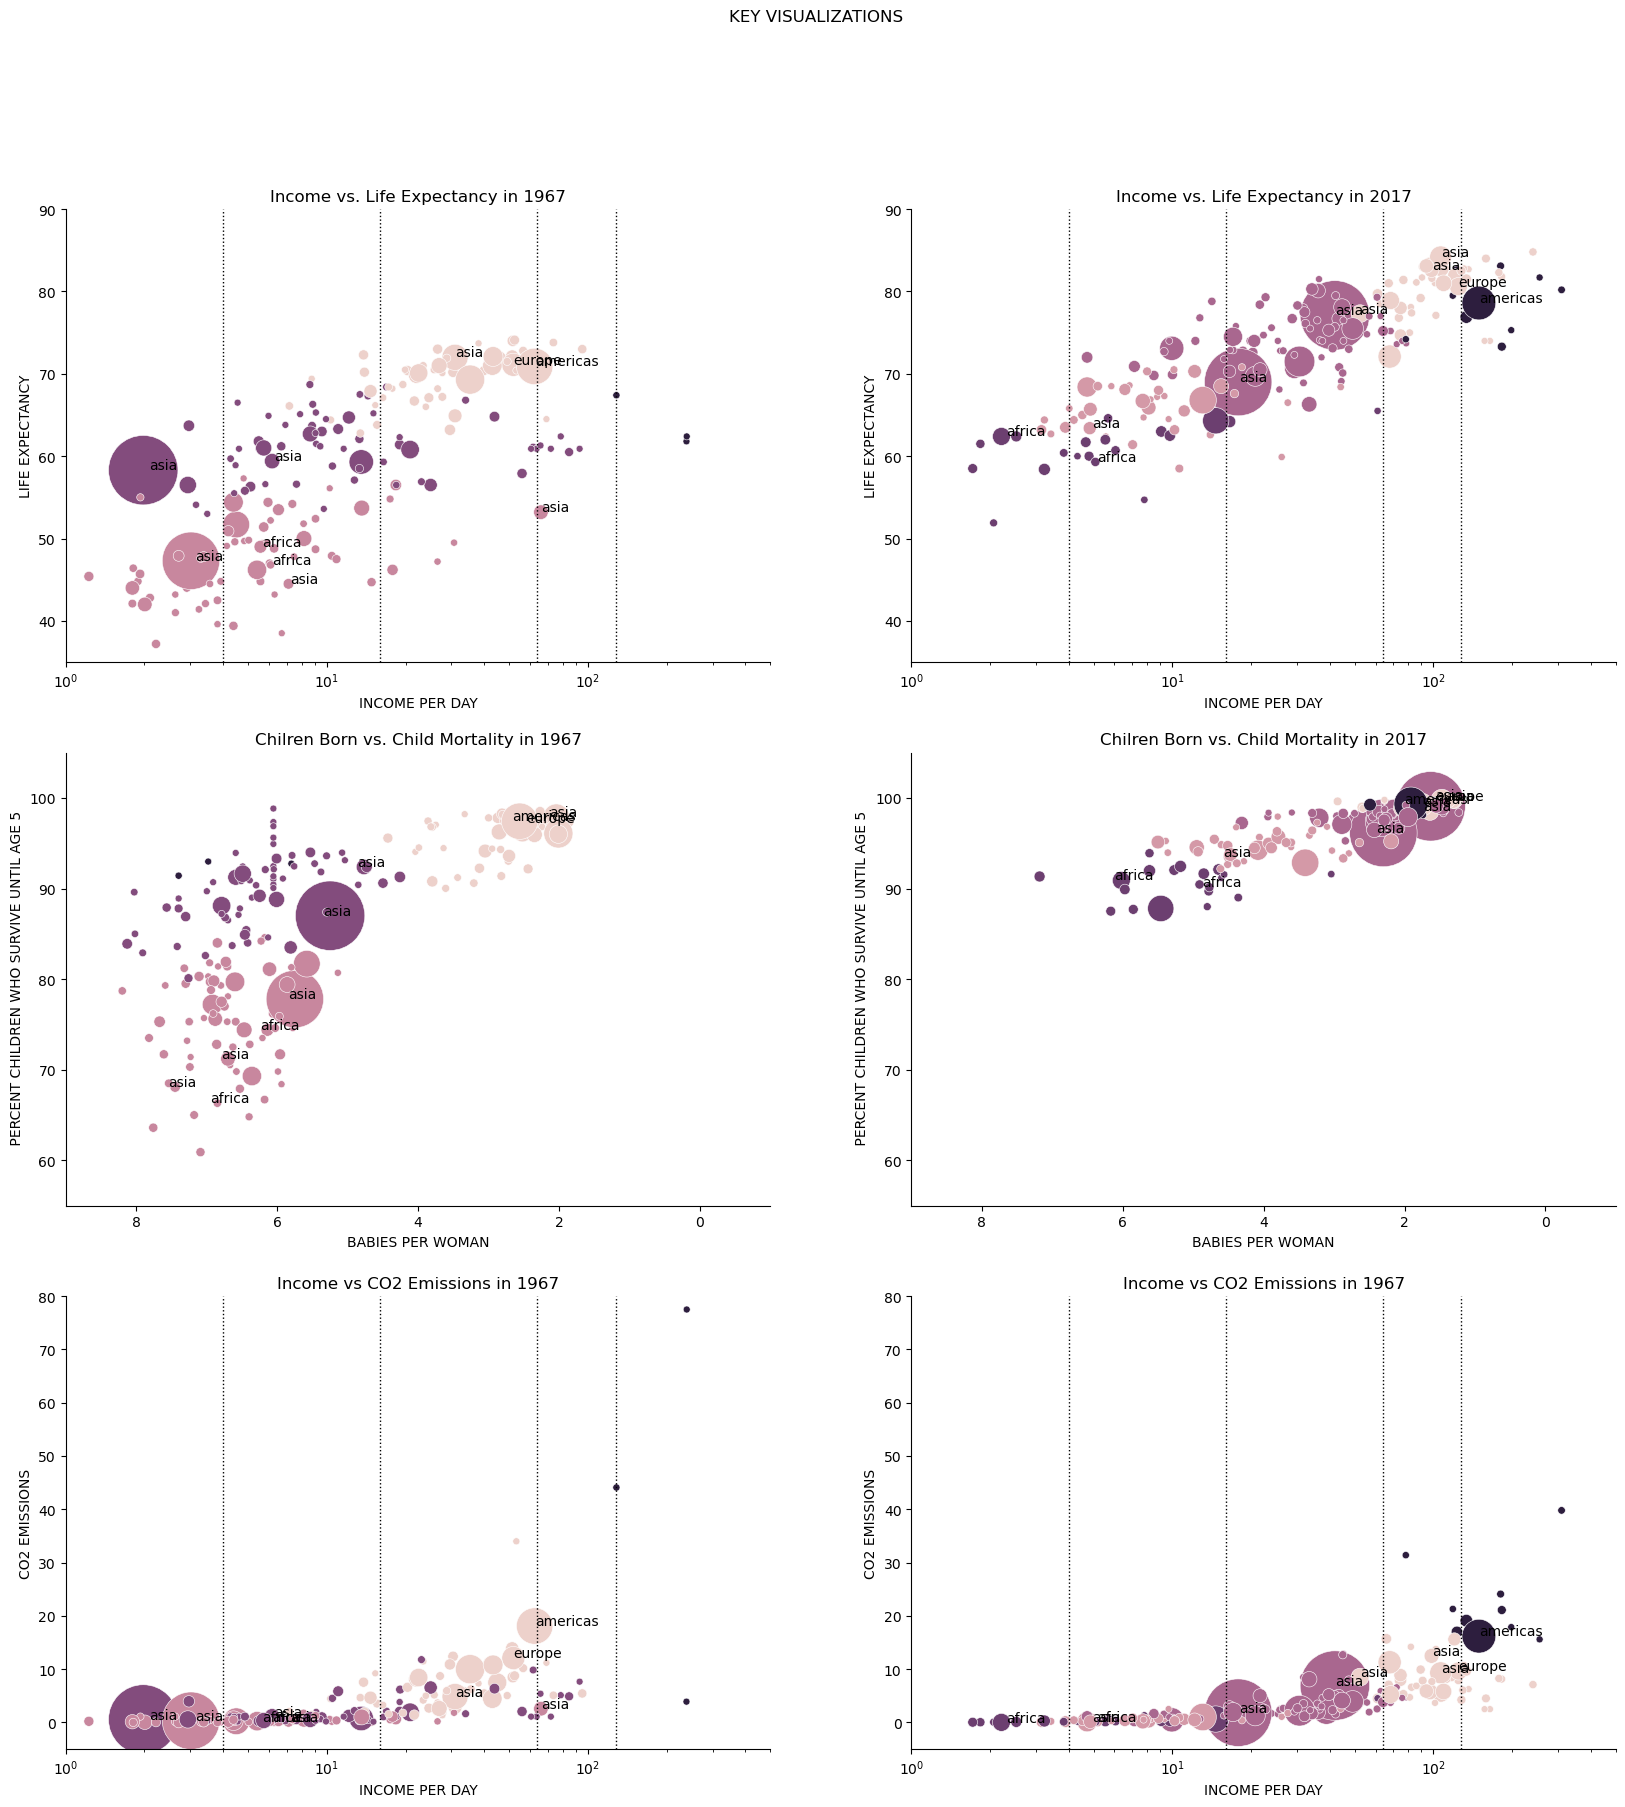

In [43]:
fig5, axes = plt.subplots(3, 2, figsize=(20, 20))
fig5.suptitle('KEY VISUALIZATIONS')
sns.scatterplot(ax=axes[0,0], data=stats1967, x='income_per_day', y='life_expectancy', hue='groups_4', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0,0].set(xscale='log', xlim=(1, 500), ylim=(35, 90), xlabel='INCOME PER DAY', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 1967')
axes[0,0].vlines(x=[4, 16, 64, 128], ymin=35, ymax=90, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[0,1], data=stats2017, x='income_per_day', y='life_expectancy', hue='groups_5', size='scaled pop',sizes=(25, 2500), legend=False)
axes[0,1].set(xscale='log', xlim=(1, 500), ylim=(35, 90), xlabel='INCOME PER DAY', ylabel='LIFE EXPECTANCY', title='Income vs. Life Expectancy in 2017')
axes[0,1].vlines(x=[4, 16, 64, 128], ymin=35, ymax=90, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[1,0], data=stats1967, x='children_per_woman', y='child_survival_percent', hue='groups_4', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,0].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 1967')
sns.scatterplot(ax=axes[1,1], data=stats2017, x='children_per_woman', y='child_survival_percent', hue='groups_5', size='scaled pop',sizes=(25, 2500), legend=False)
axes[1,1].set(xscale='linear', xlim=(9, -1), ylim=(55, 105), xlabel='BABIES PER WOMAN', ylabel=' PERCENT CHILDREN WHO SURVIVE UNTIL AGE 5', title='Chilren Born vs. Child Mortality in 2017')
sns.scatterplot(ax=axes[2,0], data=stats1967, x='income_per_day', y='co2_emissions', hue='groups_4', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,0].set(xscale='log', xlim=(1, 500), ylim=(-5, 80), xlabel='INCOME PER DAY', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
axes[2,0].vlines(x=[4, 16, 64, 128], ymin=-5, ymax=80, linewidth=1, color='black', linestyles='dotted')
sns.scatterplot(ax=axes[2,1], data=stats2017, x='income_per_day', y='co2_emissions', hue='groups_5', size='scaled pop', sizes=(25, 2500), legend=False)
axes[2,1].set(xscale='log', xlim=(1, 500), ylim=(-5, 80), xlabel='INCOME PER DAY', ylabel='CO2 EMISSIONS', title='Income vs CO2 Emissions in 1967')
axes[2,1].vlines(x=[4, 16, 64, 128], ymin=-5, ymax=80, linewidth=1, color='black', linestyles='dotted')
label_point(stats1967['income_per_day'], stats1967['life_expectancy'], stats1967['region'], axes[0,0])
label_point(stats2017['income_per_day'], stats2017['life_expectancy'], stats2017['region'], axes[0,1])
label_point(stats1967['children_per_woman'], stats1967['child_survival_percent'], stats1967['region'], axes[1,0])
label_point(stats2017['children_per_woman'], stats2017['child_survival_percent'], stats2017['region'], axes[1,1])
label_point(stats1967['income_per_day'], stats1967['co2_emissions'], stats1967['region'], axes[2,0])
label_point(stats2017['income_per_day'], stats2017['co2_emissions'], stats2017['region'], axes[2,1])
sns.despine()